In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
print(session.query(Measurement.date).order_by(Measurement.date.desc()).first())

('2017-08-23',)


Query Date:  2016-08-23


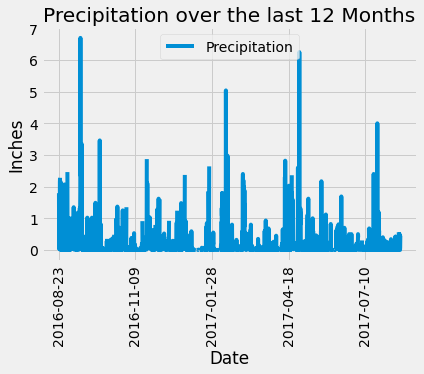

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23')

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results)
results_df.columns = ['Date', 'Precipitation']
results_df = results_df.set_index('Date')

# Sort the dataframe by date
results_df = results_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(title = 'Precipitation over the last 12 Months', rot=90).set_ylabel("Inches")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
number = session.query(Station.station).count()
print(f'There are {number} total stations in the dataset.')

There are 9 total stations in the dataset.


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
stations = session.query(Measurement.station,
                         func.count(Measurement.station)).\
                         group_by(Measurement.station).\
                         order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calcs = session.query(func.max(Measurement.prcp),
                      func.min(Measurement.prcp),
                      func.avg(Measurement.prcp)).\
                      filter(Measurement.station == 'USC00519281').all()
for row in calcs:
    print(f'Station USC00519281 Precipitation: Max = {row[0]}in, Min = {row[1]}in, Avg = {round(row[2],2)}in')

Station USC00519281 Precipitation: Max = 9.64in, Min = 0.0in, Avg = 0.21in


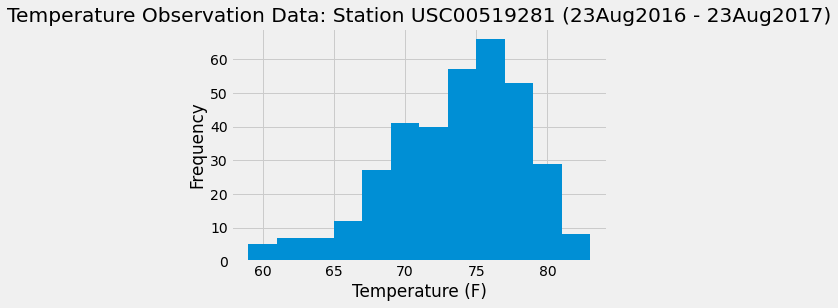

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
TOBS = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.station == 'USC00519281').all()
TOBS_df = pd.DataFrame(TOBS)
    
# Plot the results as a histogram with bins=12
TOBS_df.hist(column='tobs', bins=12)
plt.title("Temperature Observation Data: Station USC00519281 (23Aug2016 - 23Aug2017)")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.show()

# Close session

In [16]:
# Close Session
session.close()